# step 1:- Data Loading

In [2]:
import pandas as pd
df = pd.read_csv("Road Accident Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# data preparation

In [3]:
df.shape

(12316, 32)

<Axes: xlabel='Accident_severity'>

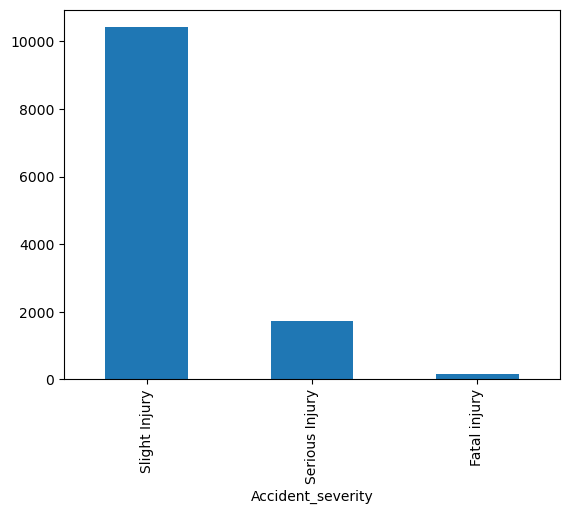

In [ ]:
df['Accident_severity'].value_counts().plot(kind='bar')   #target column  #plot using pandas

In [11]:
df['Time'] = pd.to_datetime(df['Time'])   #to date and time 

C:\Users\Hamza\AppData\Local\Temp\ipykernel_12500\4269098869.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])   #to date and time


In [12]:
df['hour']= df['Time'].dt.hour   #extract the hour from time column

In [13]:
new_df = df.copy()  #new dataframe
new_df.drop('Time', axis=1, inplace=True)

In [14]:
new_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


# encode target column

In [17]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_df['Accident_severity']= lb.fit_transform(new_df['Accident_severity'])
new_df['Accident_severity']

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Accident_severity, Length: 12316, dtype: int64

# balance dataset

In [28]:
#balancing on target column is essential to avoid the biasness of model, and we have to also include x in balancing to align  extra target generated during balancing with input
from imblearn.over_sampling import RandomOverSampler

x = new_df.drop(columns=['Accident_severity'])  #all input column to x
y = new_df['Accident_severity']

oversampler = RandomOverSampler(random_state=42)
x_balance, y_balance =oversampler.fit_resample(x,y)  #here we balance x bcz to align with corresponding y(target), its compulsory
y_balance.value_counts()   #now value of target column is balance, model do not bias

Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_balance, y_balance, test_size=0.20, random_state=42)

# filling missing values

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the strategies for each column
strategies = {
    3: 'most_frequent',   # Educational_level
    4: 'most_frequent',   # Vehicle_driver_relation
    5: 'most_frequent',   # Driving_experience
    6: 'most_frequent',   # Type_of_vehicle
    8: 'constant',        # Service_year_of_vehicle
    9: 'constant',        # Defect_of_vehicle
    10: 'most_frequent',  # Area_accident_occured
    11: 'most_frequent',  # Lanes_or_Medians
    12: 'most_frequent',  # Road_allignment
    13: 'most_frequent',  # Types_of_Junction
    14: 'most_frequent',  # Road_surface_type
    18: 'most_frequent',  # Type_of_collision
    21: 'most_frequent',  # Vehicle_movement
    26: 'most_frequent',  # Work_of_casuality
    27: 'most_frequent'   # Fitness_of_casuality
}

# Create a ColumnTransformer for data preprocessing
tf1 = ColumnTransformer([
    ('impute_educational_level', SimpleImputer(strategy=strategies[3]), [3]),
    ('impute_Vehicle_driver_relation', SimpleImputer(strategy=strategies[4]), [4]),
    ('impute_Driving_experience', SimpleImputer(strategy=strategies[5]), [5]),
    ('impute_Type_of_vehicle', SimpleImputer(strategy=strategies[6]), [6]),
    ('impute_Service_year_of_vehicle', SimpleImputer(strategy=strategies[8], fill_value='Unknown'), [8]),
    ('impute_Defect_of_vehicle', SimpleImputer(strategy=strategies[9], fill_value='Unknown'), [9]),
    ('impute_Area_accident_occured', SimpleImputer(strategy=strategies[10]), [10]),
    ('impute_Lanes_or_Medians', SimpleImputer(strategy=strategies[11]), [11]),
    ('impute_Road_allignment', SimpleImputer(strategy=strategies[12]), [12]),
    ('impute_Types_of_Junction', SimpleImputer(strategy=strategies[13]), [13]),
    ('impute_Road_surface_type', SimpleImputer(strategy=strategies[14]), [14]),
    ('impute_Type_of_collision', SimpleImputer(strategy=strategies[18]), [18]),
    ('impute_Vehicle_movement', SimpleImputer(strategy=strategies[21]), [21]),
    ('impute_Work_of_casuality', SimpleImputer(strategy=strategies[26]), [26]),
    ('impute_Fitness_of_casuality', SimpleImputer(strategy=strategies[27]), [27])
], remainder='passthrough')

# encoding of categorical value

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the object columns indices
object_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25,26,27,28,29,30]

# Create a ColumnTransformer for one-hot encoding only object columns
tf2 = ColumnTransformer([
    (f'ohe_{col}', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [col])
    for col in object_columns_indices
], remainder='passthrough')


# scaling

In [ ]:
''' from sklearn.preprocessing import MinMaxScaler

tf3 = ColumnTransformer(
    [
        ('scale', MinMaxScaler(), columns you want)
    ], remainder='passthrough'
)'''

# feature selection using Chi-2 statistics

In [32]:
# select only features which really matters for better prediction and remove the unusal features using chi2 statistics
from sklearn.feature_selection import SelectKBest, chi2

tf4 = SelectKBest(chi2, k=50) #k=no. of cols  #no need to use column transformer 

# Model(random forest classifier)

In [33]:
from sklearn.ensemble import RandomForestClassifier

tf5 = RandomForestClassifier()

# Pipeline

In [34]:
from sklearn.pipeline import Pipeline   #pipeline construction 

pipe = Pipeline([
    ('tf1', tf1),
    ('tf2', tf2),
    ('tf4', tf4),
    ('tf5', tf5)
])

# TRAIN THE MODEL

pipe.fit(X_train, y_train)


Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_educational_level',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('impute_Vehicle_driver_relation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4]),
                                                 ('impute_Driving_experience',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_Type_of_vehicle',
                                                  SimpleImputer(strat...
                                                                sparse_output=False),
                                                  [26]),
                                                 ('ohe_27',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [27]),
                                                 ('ohe_28',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [28]),
                                                 ('ohe_29',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [29]), ...])),
                ('tf4',
                 SelectKBest(k=50,
                             score_func=<function chi2 at 0x00000233DA21A840>)),
                ('tf5', RandomForestClassifier())])

# ACCURACY CHECK

In [35]:
from sklearn.metrics import accuracy_score

y_predict = pipe.predict(X_test)
accuracy_score(y_test, y_predict)

0.9244679148663786

# classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2085
           1       0.85      0.95      0.90      2100
           2       0.96      0.82      0.88      2064

    accuracy                           0.92      6249
   macro avg       0.93      0.92      0.92      6249
weighted avg       0.93      0.92      0.92      6249



# confusion metrices

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[2085    0    0]
 [  22 2002   76]
 [  24  350 1690]]


# Save Pipe (using pickle, also we can use joblib)

In [38]:
import pickle
pickle.dump(pipe,open('my pipe.pkl', 'wb'))

# Use Pipe for website(for allowing user for input)